# Condition number study

This notebook shows the study of the condition number of the matrix $A$ as a function of the number of particles and layers in the events.

## $\kappa$ vs. number of particles

The condition number $\kappa$ is evaluated on toy events in a detector with 10 layers. The number of particles ranges between 2 and 100

In [6]:
from trackhhl.toy.simple_generator import SimpleDetectorGeometry, SimpleGenerator
from trackhhl.hamiltonians.simple_hamiltonian import SimpleHamiltonian
from dataclasses import dataclass, field
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import eigsh

N_LAYERS = 10           # Half of the VELO
MIN_PARTICLES = 2       #
MAX_PARTILCES = 100      # ~1600 hits maximum
THRESHOLD = .45
DETECTOR = SimpleDetectorGeometry([i for i in range(N_LAYERS)], [float("+inf") for i in range(N_LAYERS)], [float("+inf") for i in range(N_LAYERS)], [i+1 for i in range(N_LAYERS)])

@dataclass
class Run:
    min_particles: int  = MIN_PARTICLES
    max_particles: int  = MAX_PARTILCES  
    n_layers: int       = N_LAYERS
    n_particles: int    = field(default_factory=list)
    lambda_min: list    = field(default_factory=list)
    lambda_max: list    = field(default_factory=list)
    kappa: list         = field(default_factory=list)
    hits : list         = field(default_factory=list)
    segments : list     = field(default_factory=list)
    detector : list     = DETECTOR
    max_theta : list    = np.pi / 3
    epsilon : float     = 1e-5
    gamma : float       = 2.0
    delta : float       = 1.0
    
              
    def execute(self):
        generator = SimpleGenerator(self.detector, theta_max=self.max_theta)
    
        for n_particles in range(self.min_particles, self.max_particles):
            event = generator.generate_event(n_particles)
            self.hits.append(len(event.hits))
            self.n_particles.append(n_particles)
            hamiltonian = SimpleHamiltonian(self.epsilon, self.gamma, self.delta)
            hamiltonian.construct_hamiltonian(event)
            largest_eigval,  = eigsh(hamiltonian.A, k=1, which="LM", return_eigenvectors=False)
            smallest_eigval,  = eigsh(hamiltonian.A, k=1, which="SM", return_eigenvectors=False)
            self.lambda_max.append(largest_eigval)
            self.lambda_min.append(smallest_eigval)
            kappa = np.abs(largest_eigval/smallest_eigval)
            self.kappa.append(kappa)
            self.segments.append(len(hamiltonian.segments))
            print(f"{n_particles}   {largest_eigval}    {smallest_eigval}   {kappa}")
            
            #solution = hamiltonian.solve_classicaly()
            
            #discretised_solution = (solution > THRESHOLD)
            #truth_solution = [seg.hit_from.track_id == seg.hit_to.track_id for seg in hamiltonian.segments]
            
            

In [7]:
run = Run()
run.execute()

2   4.902113032590309    1.0978869674096918   4.465043468141486
3   4.902113032590308    1.0978869674096925   4.465043468141483
4   4.90211303259031    1.0978869674096907   4.4650434681414914
5   4.902113032590307    1.097886967409692   4.4650434681414835
6   4.902113032590309    1.0978869674096923   4.465043468141484
7   4.902113032590309    1.097886967409693   4.465043468141482
8   4.902113032590307    1.0978869674096914   4.465043468141486
9   4.902113032590308    1.0978869674096914   4.465043468141487
10   4.902113032590307    1.0978869674096927   4.465043468141481
11   4.902113032590308    1.0978869674096925   4.465043468141483
12   4.902113032590306    1.097886967409693   4.465043468141479
13   4.902113032590309    1.097886967409692   4.465043468141485
14   4.902113032590308    1.0978869674096934   4.465043468141479
15   4.902113032590309    1.0978869674096932   4.465043468141481
16   4.90211303259031    1.0978869674096916   4.465043468141488
17   4.902113032590313    1.097886967

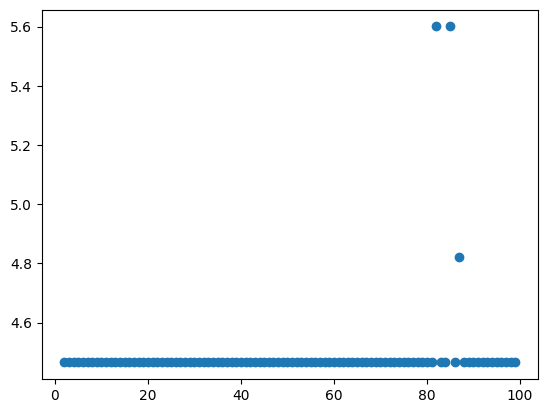

In [8]:
plt.scatter(run.n_particles, run.kappa)

## $\kappa$ vs number of layers

In this case we keep the number of particles constant to 50 and vary the number of layers in the detector from 3 to 30.

In [9]:
MIN_LAYERS = 3            # Half of the VELO
MAX_LAYERS = 30           # Half of the VELO
N_PARTICLES = 50
THRESHOLD = .45


@dataclass
class RunLayer:
    n_particles: int  = N_PARTICLES
    min_layers: int     = MIN_LAYERS
    max_layers: int     = MAX_LAYERS
    n_layers: int       = field(default_factory=list)
    lambda_min: list    = field(default_factory=list)
    lambda_max: list    = field(default_factory=list)
    kappa: list         = field(default_factory=list)
    hits : list         = field(default_factory=list)
    segments : list     = field(default_factory=list)
    detector : list     = DETECTOR
    max_theta : list    = np.pi / 3
    epsilon : float     = 1e-5
    gamma : float       = 2.0
    delta : float       = 1.0
    
              
    def execute(self):
        
        
        for n_layers in range(MIN_LAYERS, MAX_LAYERS):
            detector = SimpleDetectorGeometry([i for i in range(n_layers)], [float("+inf") for i in range(n_layers)], [float("+inf") for i in range(n_layers)], [i+1 for i in range(n_layers)])
            generator = SimpleGenerator(detector, theta_max=self.max_theta)
            event = generator.generate_event(self.n_particles)
            self.hits.append(len(event.hits))
            self.n_layers.append(n_layers)
            hamiltonian = SimpleHamiltonian(self.epsilon, self.gamma, self.delta)
            hamiltonian.construct_hamiltonian(event)
            largest_eigval,  = eigsh(hamiltonian.A, k=1, which="LM", return_eigenvectors=False)
            smallest_eigval,  = eigsh(hamiltonian.A, k=1, which="SM", return_eigenvectors=False)
            self.lambda_max.append(largest_eigval)
            self.lambda_min.append(smallest_eigval)
            kappa = np.abs(largest_eigval/smallest_eigval)
            self.kappa.append(kappa)
            self.segments.append(len(hamiltonian.segments))
            print(f"{n_layers}   {largest_eigval}    {smallest_eigval}   {kappa}")
            
            #solution = hamiltonian.solve_classicaly()
            
            #discretised_solution = (solution > THRESHOLD)
            #truth_solution = [seg.hit_from.track_id == seg.hit_to.track_id for seg in hamiltonian.segments]
            
            

In [10]:
run = RunLayer()
run.execute()

3   4.000000000000002    1.9999999999999971   2.000000000000004
4   4.4142135623731    1.585786437626902   2.783611624891233
5   4.6180339887498985    1.381966011250104   3.3416407864998794
6   4.732050807568881    1.267949192431116   3.7320508075689003
7   4.801937735804839    1.1980622641951622   4.008086957843296
8   4.847759065022579    1.1522409349774267   4.207244264514479
9   4.879385241571825    1.120614758428181   4.3542039803365125
10   4.902113032590315    1.0978869674096896   4.4650434681415
11   4.918985947228999    1.0810140527710068   4.550344127923189
12   4.9318516525781435    1.068148347421855   4.617197287700672
13   4.941883634852103    1.0581163651478933   4.67045383440542
14   4.9498558243636674    1.05014417563635   4.7135011926950225
15   4.987424419786486    1.0125755802135084   4.92548360561377
16   4.961570560806476    1.0384294391935383   4.777956376756532
17   4.965946199367806    1.0340538006321958   4.802406022135159
18   4.969615506024416    1.0303844939

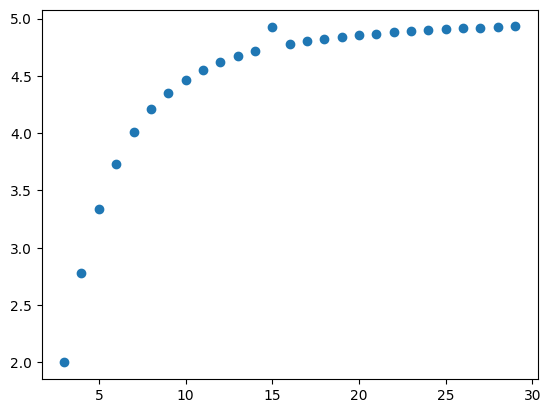

In [11]:
plt.scatter(run.n_layers, run.kappa)

## Conclusions

The condition number $\kappa$ stays constant as a function of the number of particles while it increases asymptotically towards $\approx 5$ as a function of the number of detection layers.